<a href="https://colab.research.google.com/github/lydiahiba/exploradome_tangram/blob/cnn---team-2/projet_exploradome_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import datetime
from fastai.vision import *
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

## Connect in google drive

In [ ]:
# Google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Unzip file

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
'Colab Notebooks'   model1   model2	     weight_model2
 Exploradome	    Model1   weight_model1


In [ ]:
# creata directory videos
os.makedirs("data", exist_ok=True)
!mv data /content

In [ ]:
!ls content

gdrive	sample_data


In [ ]:
!unzip "/content/gdrive/My Drive/Exploradome/train.zip" -d "/content/"

In [ ]:
!unzip "/content/gdrive/My Drive/Exploradome/test.zip" -d "/content/"

In [ ]:
!ls content

gdrive	sample_data  test  train


## Create labels

In [ ]:
# create labels and path
TRAIN = ("/content/train")
TEST = ("/content/test")
Labels = ['bateau', 'bol', 'chat', 'coeur', 'cygne', 'lapin', 'maison', 'marteau', 'montagne', 'pont', 'renard','tortue']

/content/train/bateau/Bateau_right_138.jpg


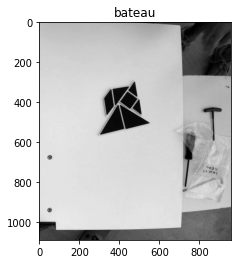

In [ ]:
# Show img train
for label in Labels:
    path = os.path.join(TRAIN, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(path, img))
        plt.imshow(img_array, cmap="gray")
        plt.title(Labels[os.listdir(path).index(img)])
        plt.show()
        break
    break

/content/test/bateau/Bateau_right_6.jpg


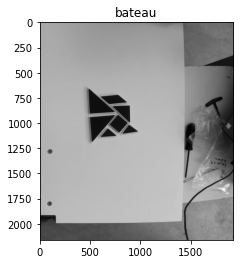

In [ ]:
# Show img test
for label in Labels:
    path = os.path.join(TEST, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(path, img))
        plt.imshow(img_array, cmap="gray")
        plt.title(Labels[os.listdir(path).index(img)])
        plt.show()
        break
    break

## Create data

In [ ]:
def creat_train_data(PATH):
  data = []
  images = []
  targets = []

  IMG_SIZE = tuple((250, 250))
  for label in Labels:
      path = os.path.join(PATH, label)  
      index_ = Labels.index(label)
      for img in os.listdir(path):
          try:
              img_array = cv2.imread(os.path.join(path, img))
              new_array = cv2.resize(img_array, IMG_SIZE, interpolation=cv2.INTER_AREA)
              imgGray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
              imgGray_flat=np.array(imgGray).flatten()
              images.append(imgGray)
              targets.append(index_)
              data.append(imgGray_flat)
          except Exception as e:
              print(e)
  return data, images, targets

In [ ]:
data_train, image_train, targets_train = creat_train_data(TRAIN)

In [ ]:
data_test, image_test, targets_test = creat_train_data(TEST)

In [ ]:
print(len(image_train))
print(len(data_train))
print(len(targets_train))

669
669
669


In [ ]:
print(len(image_test))
print(len(data_test))
print(len(targets_test))

249
249
249


In [ ]:
# transform data train to numpy array
image_train = np.array(image_train)
data_train = np.array(data_train)
targets_train = np.array(targets_train)

In [ ]:
# transform data train to numpy array
image_test = np.array(image_test)
data_test = np.array(data_test)
targets_test = np.array(targets_test)

In [ ]:
# shape train
print(image_train.shape)
print(data_train.shape)
print(targets_train.shape)

(669, 250, 250)
(669, 62500)
(669,)


In [ ]:
# shape test
print(image_test.shape)
print(data_test.shape)
print(targets_test.shape)

(249, 250, 250)
(249, 62500)
(249,)


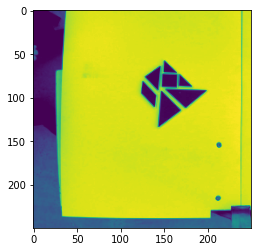

In [ ]:
plt.imshow(image_train[3])

## Preprocessing

In [ ]:
# facilité les calcules
def preprocess_image(img):
    return img / 255.0

In [ ]:
# preprocessing image_train
train = []
for i in range(len(image_train)):
    train.append(preprocess_image(image_train[i]))

In [ ]:
# Apres 
train[1]

array([[0.713725, 0.713725, 0.713725, 0.713725, ..., 0.580392, 0.321569, 0.705882, 0.698039],
       [0.713725, 0.713725, 0.713725, 0.713725, ..., 0.580392, 0.321569, 0.705882, 0.698039],
       [0.709804, 0.709804, 0.709804, 0.709804, ..., 0.576471, 0.341176, 0.713725, 0.701961],
       [0.717647, 0.717647, 0.717647, 0.717647, ..., 0.576471, 0.341176, 0.713725, 0.705882],
       ...,
       [0.211765, 0.231373, 0.239216, 0.235294, ..., 0.321569, 0.329412, 0.321569, 0.305882],
       [0.219608, 0.223529, 0.227451, 0.231373, ..., 0.305882, 0.333333, 0.341176, 0.317647],
       [0.219608, 0.219608, 0.219608, 0.219608, ..., 0.294118, 0.32549 , 0.337255, 0.32549 ],
       [0.239216, 0.235294, 0.231373, 0.231373, ..., 0.278431, 0.301961, 0.337255, 0.321569]])

In [ ]:
# transform train to numpy array
train = np.array(train)

In [ ]:
# preprocessing images_test
test = []
for i in range(len(image_test)):
    test.append(preprocess_image(image_test[i]))

In [ ]:
test = np.array(test)

In [ ]:
test[1]

array([[0.156863, 0.152941, 0.145098, 0.160784, ..., 0.662745, 0.662745, 0.666667, 0.666667],
       [0.164706, 0.164706, 0.160784, 0.156863, ..., 0.666667, 0.666667, 0.666667, 0.666667],
       [0.156863, 0.164706, 0.160784, 0.156863, ..., 0.666667, 0.666667, 0.666667, 0.670588],
       [0.156863, 0.164706, 0.152941, 0.156863, ..., 0.662745, 0.666667, 0.666667, 0.670588],
       ...,
       [0.219608, 0.231373, 0.227451, 0.231373, ..., 0.403922, 0.396078, 0.388235, 0.372549],
       [0.219608, 0.235294, 0.231373, 0.223529, ..., 0.380392, 0.380392, 0.380392, 0.364706],
       [0.227451, 0.235294, 0.227451, 0.223529, ..., 0.380392, 0.364706, 0.356863, 0.352941],
       [0.227451, 0.227451, 0.223529, 0.227451, ..., 0.380392, 0.368627, 0.352941, 0.34902 ]])

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data 
def split(X, y):
  xtr, xtes, ytr, ytes = train_test_split(X, y, test_size=0.33)
  print(f'shape of train: {xtr.shape} \n shape of test: {xtes.shape} \n shape of target train: {ytr.shape} \n shape of target test: {ytes.shape}')
  return xtr, xtes, ytr, ytes

## Model

In [ ]:
  # split images 
  img_train, img_test, target_train, target_test =  split(train, targets_train) 

shape of train: (448, 250, 250) 
 shape of test: (221, 250, 250) 
 shape of target train: (448,) 
 shape of target test: (221,)


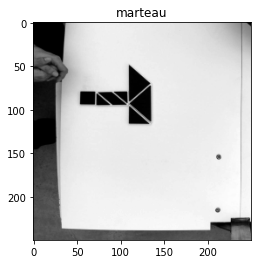

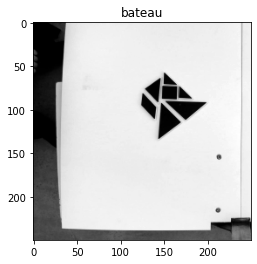

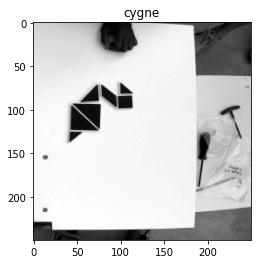

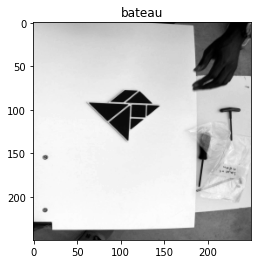

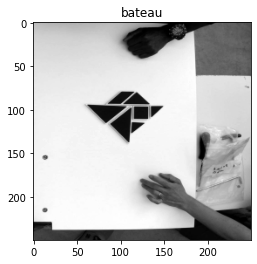

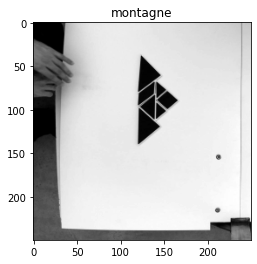

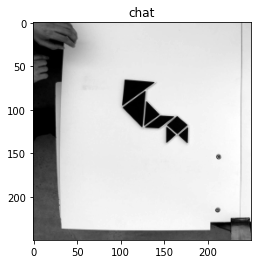

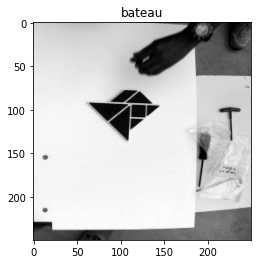

In [ ]:
# Plot some image in data
for i in range(len(target_train[100:108])):
  plt.imshow(img_train[102+i].reshape(250, 250), cmap="gray")
  plt.title(Labels[target_train[102+i]])
  plt.show()

In [ ]:
img_train[3].shape

(250, 250)

Text(0.5, 1.0, 'lapin')

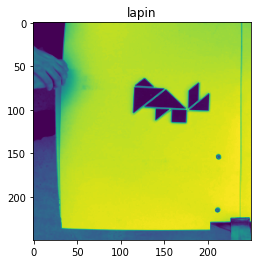

In [ ]:
plt.imshow(img_train[3])
plt.title(Labels[target_train[3]])

In [ ]:
# reshape data to have a single channel
img_train = img_train.reshape((img_train.shape[0], img_train.shape[1], img_train.shape[2], 1))
img_test = img_test.reshape((img_test.shape[0], img_test.shape[1], img_test.shape[2], 1))

In [ ]:
print(img_train.shape)
print(img_test.shape)

(448, 250, 250, 1)
(221, 250, 250, 1)


In [ ]:
# determine the shape of the input images
in_shape = img_train.shape[1:]

In [ ]:
# determine the number of classes
n_classes = len(np.unique(target_train))
print(in_shape, n_classes)

(250, 250, 1) 12


In [ ]:
layers2 = [ 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform', input_shape=img_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=tf.nn.relu, strides=(1,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax)
]

In [ ]:
layers1 = [ 
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform', input_shape=img_train.shape[1:]),    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), padding="Same", activation=tf.nn.relu, strides=(1,1), kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), padding="Same"),
 
    tf.keras.layers.Dropout(0.1),
 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax)
]

In [ ]:
model_2 = tf.keras.Sequential(layers1)

In [ ]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.01)
opt_1 = tf.keras.optimizers.SGD(lr=0.0008, momentum=0.5)

In [ ]:
model_2.compile(optimizer = tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_2 = model_2.fit(img_train, target_train, epochs=10, batch_size=5, verbose=2, validation_data=(img_test, target_test))
history_2

Epoch 1/10
90/90 - 2s - loss: 2.3035 - sparse_categorical_accuracy: 0.2790 - val_loss: 1.1966 - val_sparse_categorical_accuracy: 0.6833
Epoch 2/10
90/90 - 1s - loss: 0.7608 - sparse_categorical_accuracy: 0.7478 - val_loss: 0.5082 - val_sparse_categorical_accuracy: 0.8416
Epoch 3/10
90/90 - 1s - loss: 0.3435 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.3505 - val_sparse_categorical_accuracy: 0.9140
Epoch 4/10
90/90 - 1s - loss: 0.1737 - sparse_categorical_accuracy: 0.9397 - val_loss: 0.2538 - val_sparse_categorical_accuracy: 0.9095
Epoch 5/10
90/90 - 1s - loss: 0.1138 - sparse_categorical_accuracy: 0.9554 - val_loss: 0.2269 - val_sparse_categorical_accuracy: 0.9231
Epoch 6/10
90/90 - 1s - loss: 0.0689 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1529 - val_sparse_categorical_accuracy: 0.9593
Epoch 7/10
90/90 - 1s - loss: 0.0521 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.1620 - val_sparse_categorical_accuracy: 0.9502
Epoch 8/10
90/90 - 1s - loss: 0.0319 - sparse_ca

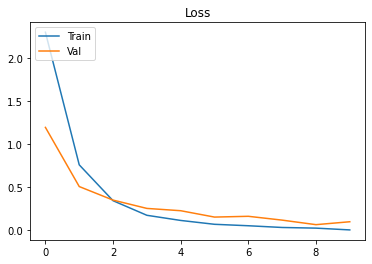

In [ ]:
loss_curve = history_2.history["loss"]

loss_val_curve = history_2.history["val_loss"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()


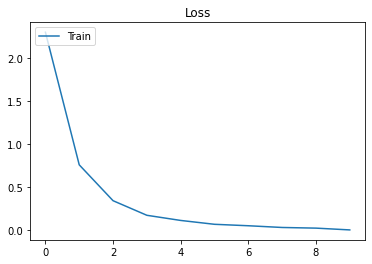

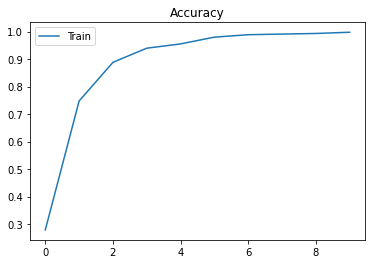

In [ ]:

loss_curve = history_2.history["loss"]
acc_curve = history_2.history["sparse_categorical_accuracy"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
#plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
#plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Evaluation

In [ ]:
# reshape data to have a single channel
eval = test.reshape((test.shape[0], test.shape[1], test.shape[2], 1))

In [ ]:
print(eval.shape)

(249, 250, 250, 1)


In [ ]:
loss, acc = model_2.evaluate(img_test, target_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

7/7 [==============================] - 0s 20ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9774
Test Loss 0.09861434996128082
Test Accuracy 0.9773755669593811


## Predict

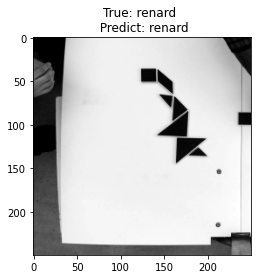

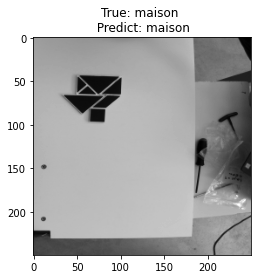

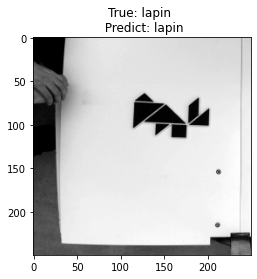

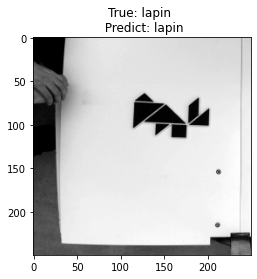

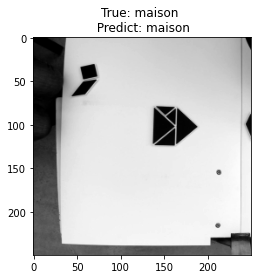

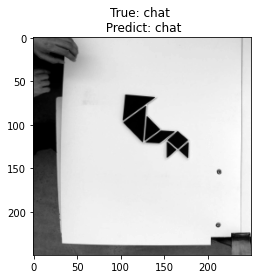

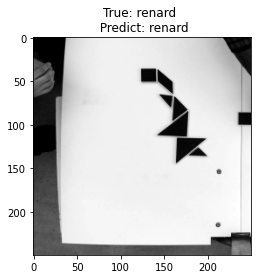

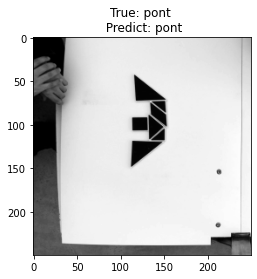

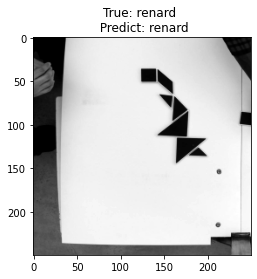

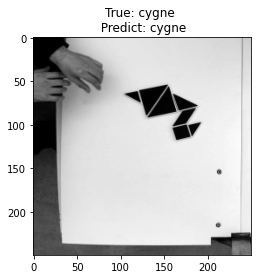

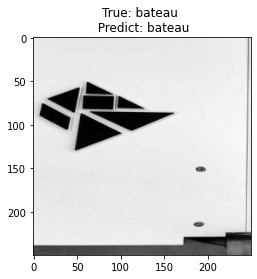

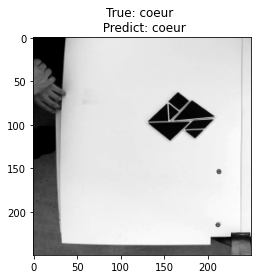

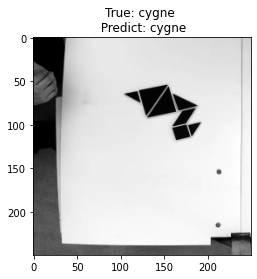

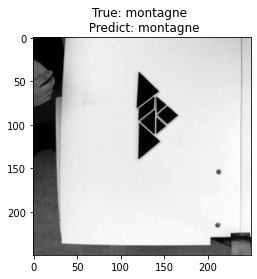

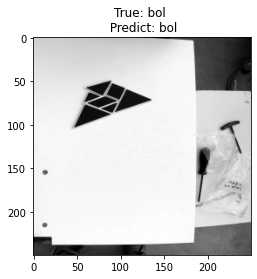

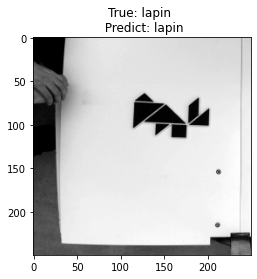

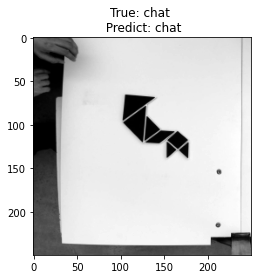

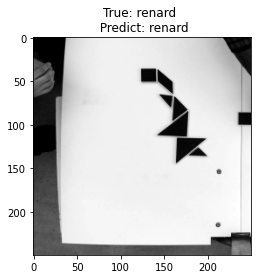

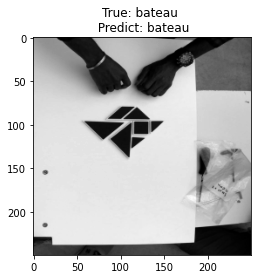

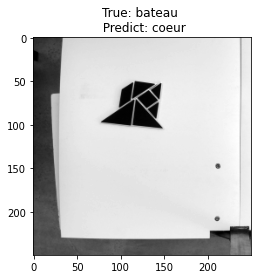

In [ ]:
# teste prediction with img test
imgs = img_test[0:20]
def prediction(model, imgs):
  for i in range(len(imgs)):
    model_output = model.predict(imgs[i:i+1])
    plt.imshow(imgs[i].reshape(250, 250), cmap="gray")
    plt.title(f'True: {Labels[target_test[i]]} \n Predict: {Labels[np.argmax(model_output)]}')
    plt.show()

prediction(model_2,imgs)

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
Y_pred_2 = model_2.predict_generator(img_test)
y_pred_2 = np.argmax(Y_pred_2, axis=1)
print('Confusion Matrix')
print(tf.math.confusion_matrix(target_test, y_pred_2))

Confusion Matrix
tf.Tensor(
[[21  0  0  1 ...  0  0  0  0]
 [ 0 21  0  0 ...  0  0  0  0]
 [ 0  0 22  1 ...  0  0  0  0]
 [ 0  0  0 17 ...  0  0  0  0]
 ...
 [ 0  0  0  0 ... 17  0  0  0]
 [ 0  0  0  0 ...  0 19  0  0]
 [ 0  0  0  0 ...  0  0 25  0]
 [ 0  0  0  0 ...  0  0  0  4]], shape=(12, 12), dtype=int32)


Confusion matrix, without normalization
[[21  0  0  1 ...  0  0  0  0]
 [ 0 21  0  0 ...  0  0  0  0]
 [ 0  0 22  1 ...  0  0  0  0]
 [ 0  0  0 17 ...  0  0  0  0]
 ...
 [ 0  0  0  0 ... 17  0  0  0]
 [ 0  0  0  0 ...  0 19  0  0]
 [ 0  0  0  0 ...  0  0 25  0]
 [ 0  0  0  0 ...  0  0  0  4]]


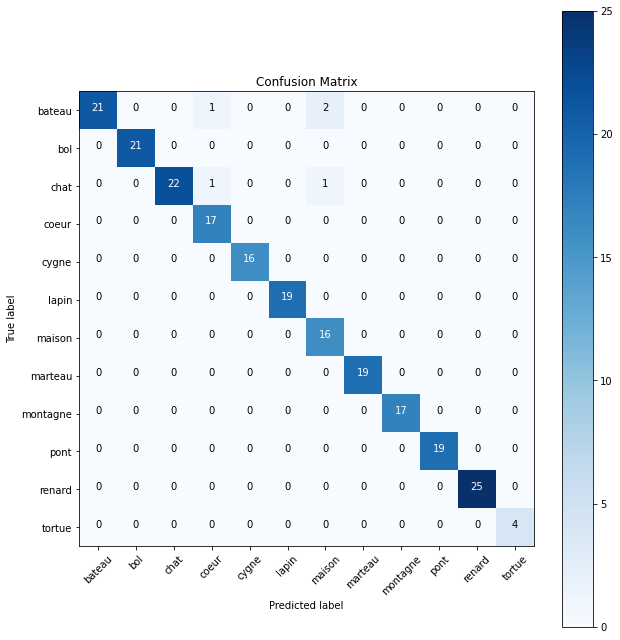

In [ ]:
cm_2 = confusion_matrix(y_true=target_test, y_pred=y_pred_2)
cm_plot_labels = Labels
plot_confusion_matrix(cm=cm_2, classes=cm_plot_labels, title='Confusion Matrix')

## Save model 1

In [ ]:
!ls /mydrive

In [ ]:
# je save les poids
# Save the weights
model.save('/mydrive/Model1') 
model.save_weights('/mydrive/weight_model1/poids_model_1')

INFO:tensorflow:Assets written to: /mydrive/Model1/assets


## Save model 2

In [ ]:
# Save the weights
model_2.save('/mydrive/model2') 
model_2.save_weights('/mydrive/weight_model2/poids_model_2')

INFO:tensorflow:Assets written to: /mydrive/model2/assets


## Check its architecture

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1712)              107001712 
_________________________________________________________________
dense_112 (Dense)            (None, 12)                20556     
Total params: 107,022,268
Trainable params: 107,022,268
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 250, 250, 16)      80        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 42, 42, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)     